In [1]:
import matplotlib.pyplot as plt
import numpy as np
from SocialNetwork.social_network_environment import *
from SocialNetwork.cascade import *
from Advertising.enviroment.bid import *
from Advertising.enviroment.VCG import *
from Advertising.learners.Greedy_algorithm import *
from Advertising.learners.GTS_Learner import *
from Advertising.learners.GTS_SW_Learner import *
from Advertising.learners.TS_no_qualities import *
from Advertising.learners.TS_no_anything import *

from tqdm.autonotebook import tqdm
from Advertising.learners.TS_sliding_window import *
import itertools
seed = 6789
random.seed(seed)
only_first = False


lambdas = [0.5, 0.42, 0.38, 0.30, 0.2, 0.05]
social_network = social_network_environment()
social_network.init_from_json(
    json_path_network='Config/network.json', json_path_features='Config/features.json')




with open("Config/estimated_influence.json", "r"):
    data = json.load(open("Config/estimated_influence.json"))

active_by_influence_reward = np.array(data.get("estimated_influence"))


In [2]:
def create_adv_bids():

    adversary_bids = []
    for _ in range(0, 10): 
        adversary_i_bids = []
        for _ in range(0, 5):
            adversary_i_bids.append(random.randint(0, 4))
        adversary_bids.append(adversary_i_bids)
    return adversary_bids

In [3]:
variance = 10
expected_values = []
sw_size = 2000
interval = 5000
n_experiments=15000
n_change = (int)(n_experiments/interval)
list_of_bids = []


arms = arms_creation(seed=30291, number_of_arms=20)

for l in range(0, n_change):
    list_of_bids.append(create_adv_bids())

## we simulate a ts for the clairvoyant, as much as the change in adversary biddings
ts_only = [] 
best_arm_indexes_only = []
expected_values_list_only = []
for r in range(0, n_change):
    ts_only.append(GTS_Learner(20, arms, variance=variance,ad_id=1))
    _, best_arm_index, _, expected_values, _ = ts(ts_only[r], arms, list_of_bids[r], only_first, n_experiments, lambdas, social_network)
    best_arm_indexes_only.append(best_arm_index)
    expected_values_list_only.append(expected_values)


ts_all = []
best_arm_indexes_all = []
expected_values_list_all = []
for r in range(0, n_change):
    ts_all.append(GTS_Learner(20, arms, variance=variance,ad_id=1))
    _, best_arm_index, _, expected_values, _ = ts(ts_all[r], arms, list_of_bids[r], only_first, n_experiments, lambdas, social_network)
    best_arm_indexes_all.append(best_arm_index)
    expected_values_list_all.append(expected_values)






In [4]:
ts_learner = GTS_SW_Learner(20, arms, variance=variance, size_SW=sw_size, ad_id=1)
ts_learner2 = GTS_SW_Learner(20, arms, variance=variance, size_SW=sw_size, ad_id=1)


for j in range(0, 1):
    print("This is TS number " + str(j))

    best_arm, best_arm_index, number_of_pulls, expected_values, thing_to_plot_only= test_sw(ts_learner, arms, list_of_bids, only_first, n_experiments, lambdas, social_network, interval)
    best_arm2, best_arm_index2, number_of_pulls2, expected_values2, thing_to_plot_all= test_sw(ts_learner2, arms, list_of_bids, not only_first, n_experiments, lambdas, social_network, interval)


This is TS number 0


THE BEST ARM FOR EXPERIMENT ONLY FIRST IS: [2 3 2 1 1] INDEX 14
THE BEST ARM FOR EXPERIMENT total IS: [0 4 3 3 1] INDEX 9


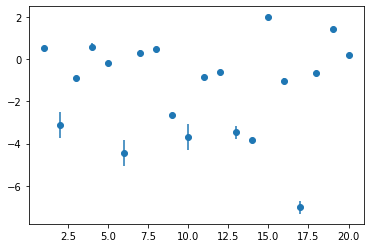

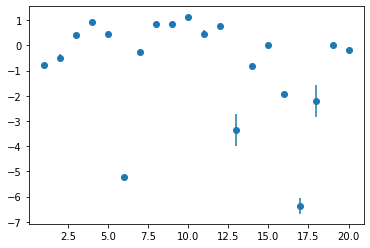

In [5]:

print("THE BEST ARM FOR EXPERIMENT ONLY FIRST IS:",
      arms[best_arm_index], "INDEX", best_arm_index)
print("THE BEST ARM FOR EXPERIMENT total IS:",
      arms[best_arm_index2], "INDEX", best_arm_index2)

array = [i+1 for i in range(0, 20)]


plt.figure(0)
plt.errorbar(array, expected_values, yerr=(1/ts_learner.tau0), fmt='o')
plt.figure(1)
plt.errorbar(array, expected_values2, yerr=(1/ts_learner2.tau0), fmt='o')

plt.show()




15003
15003


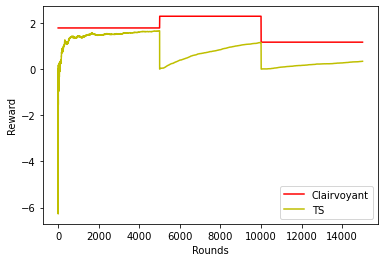

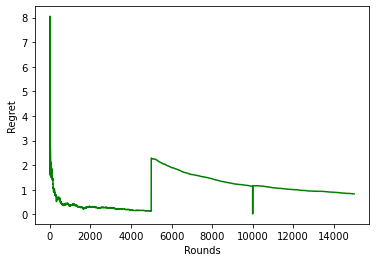

In [13]:
# best_values = []
# j = 0
# k = 0
# for i in range(n_experiments):
#     k += 1
#     best_values.append(clair_ex[j])
#     if k == sw_size:
#         k = 0
#         j += 1

# regret_no_qualities = [
#     best_values[x] - thing_to_plot[x] for x in range(len(thing_to_plot))]

## Here i calculate the clairvoyant running the algorithm in a static enviroment as much as the times i vary the adversarial bids
clairvoyant_only = []

for i,index in enumerate(best_arm_indexes_only):
    for j in range(0, interval):
        clairvoyant_only.append(expected_values_list_only[i][index])

#the following three lines of code are to adjust the lenght of the clairvoyant to the lenght of the expected value array
clairvoyant_only.append(expected_values_list_only[2][best_arm_indexes_only[2]])
clairvoyant_only.append(expected_values_list_only[2][best_arm_indexes_only[2]])
clairvoyant_only.append(expected_values_list_only[2][best_arm_indexes_only[2]])
        

plt.figure(0)
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.plot(clairvoyant_only, 'r')
plt.plot(thing_to_plot_only, 'y')
plt.legend(["Clairvoyant", "TS" ])

print(len(thing_to_plot_only))
print(len(clairvoyant_only))
regret_only = []
for i in range(0, len(thing_to_plot_only)):
    regret_only.append(clairvoyant_only[i] - thing_to_plot_only[i])

plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_only, 'g')


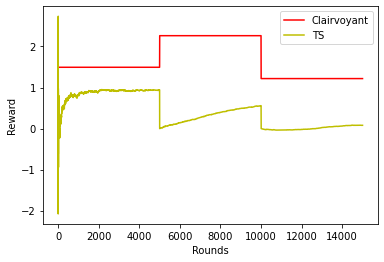

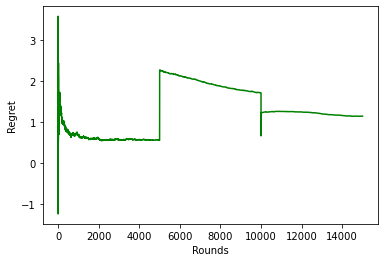

In [14]:
clairvoyant_all = []

for i,index in enumerate(best_arm_indexes_all):
    for j in range(0, interval):
        clairvoyant_all.append(expected_values_list_all[i][index])

clairvoyant_all.append(expected_values_list_all[2][best_arm_indexes_all[2]])
clairvoyant_all.append(expected_values_list_all[2][best_arm_indexes_all[2]])
clairvoyant_all.append(expected_values_list_all[2][best_arm_indexes_all[2]])
        
        

plt.figure(0)
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.plot(clairvoyant_all, 'r')
plt.plot(thing_to_plot_all, 'y')
plt.legend(["Clairvoyant", "TS" ])


regret_all = []
for i in range(0, len(thing_to_plot_all)):
    regret_all.append(clairvoyant_all[i] - thing_to_plot_all[i])




plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_all, 'g')

